In [ ]:
import requests
import torch
from PIL import Image
from pathlib import Path
from mlmamba import load
import matplotlib.pyplot as plt

print("start load ML-Mamba model.")

# Read the Hugging Face token
hf_token = Path(".hf_token").read_text().strip()

# Set the device and dtype
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
dtype = torch.bfloat16 if torch.cuda.is_bf16_supported() else torch.float16

# Load the pretrained VLM
model_id = "mlmamba+3b"
vlm = load(model_id, hf_token=hf_token)
vlm.to(device, dtype=dtype)

print("load ML-Mamba model complete.")

In [15]:
image_files = [
    'test0.png', 'test1.png', 'test2.png', 'test3.png', 
    'test4.png', 'test5.png', 'test6.png'
]

user_prompts = [
    "Provide a detailed description of this image",
    "Is the bicycle parked on the right side of the dog?",
    "What's unusual about this photo?",
    "What should I pay attention to when I come here?",
    "Can I swim here?",
    "What's going on in this picture?",
    "What's going on in this picture?"
]

generate_params = {
    'use_cache': True,
    'do_sample': True,
    'temperature': 1.0,
    'max_new_tokens': 256
}

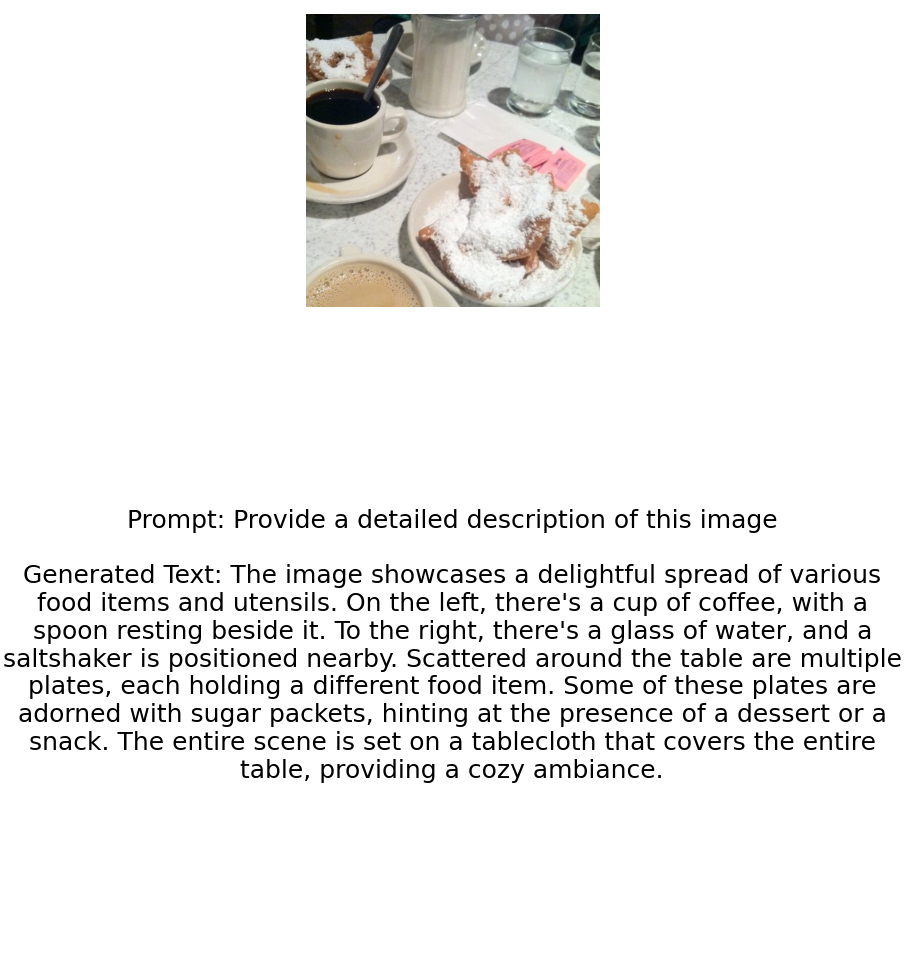

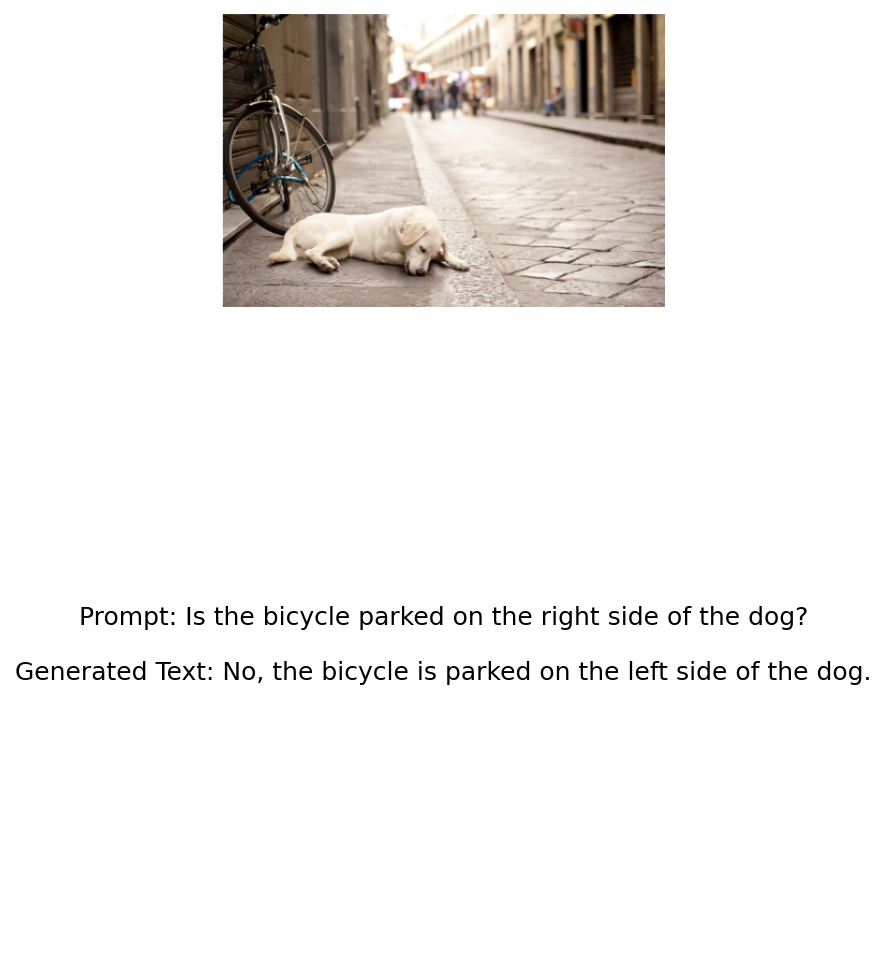

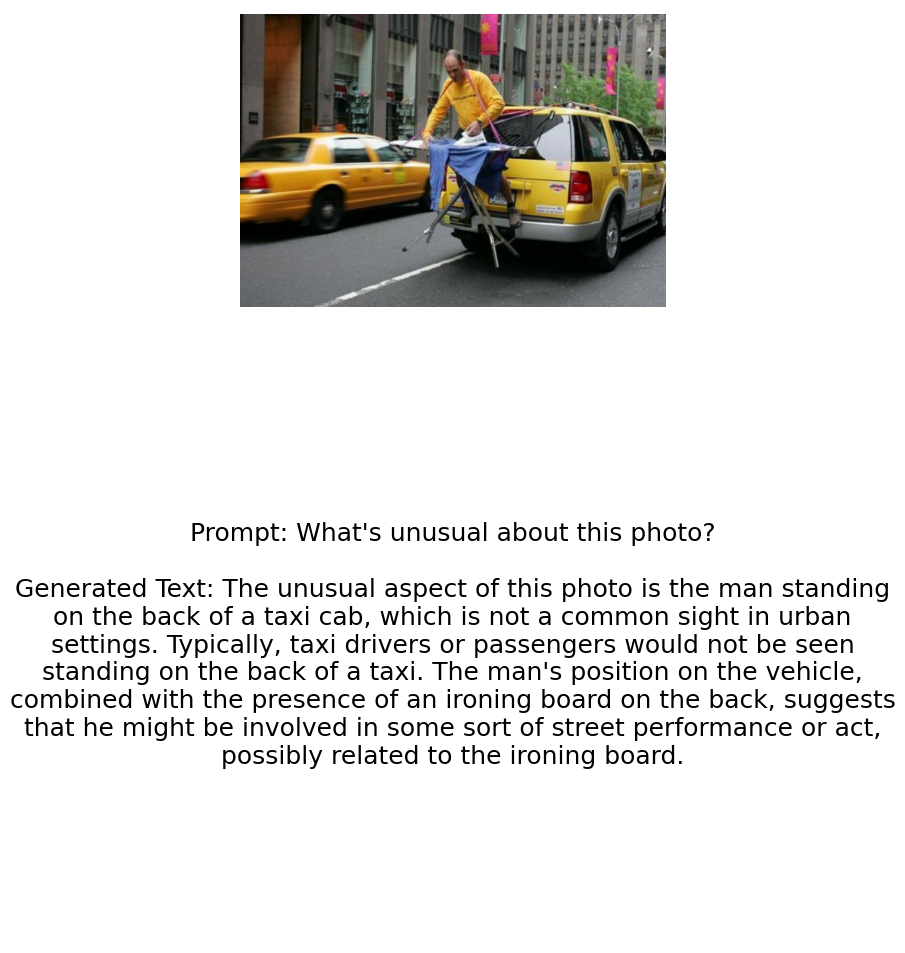

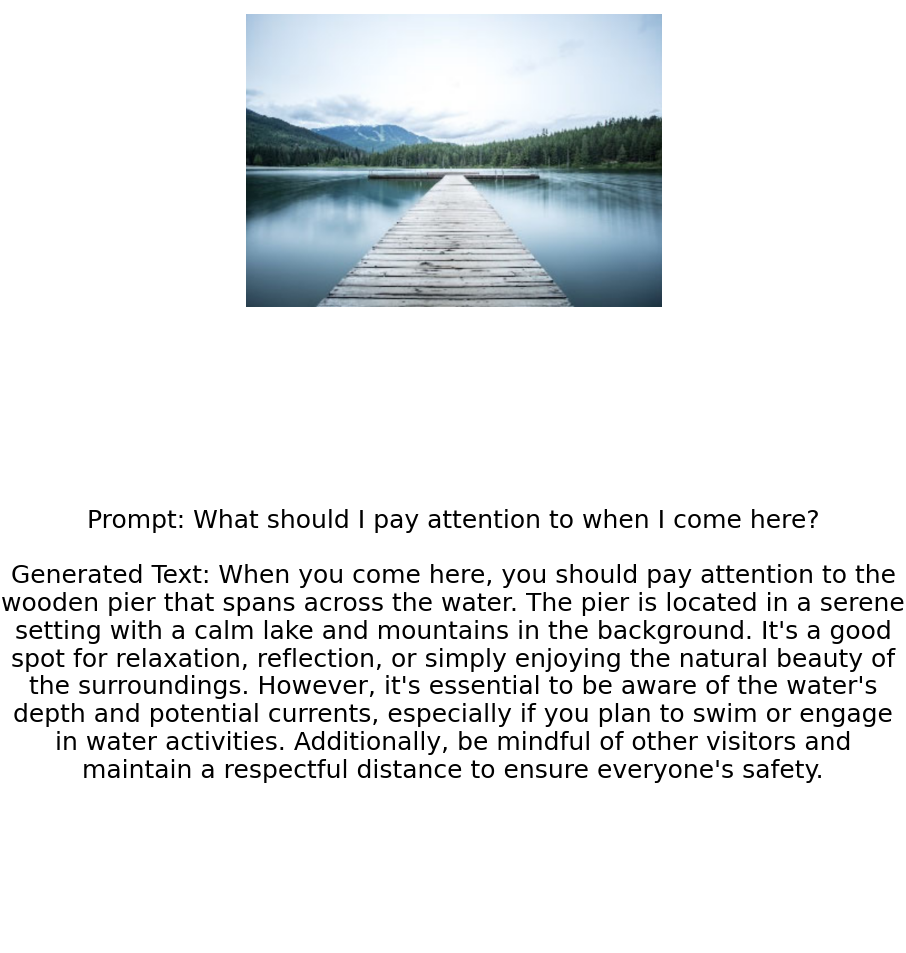

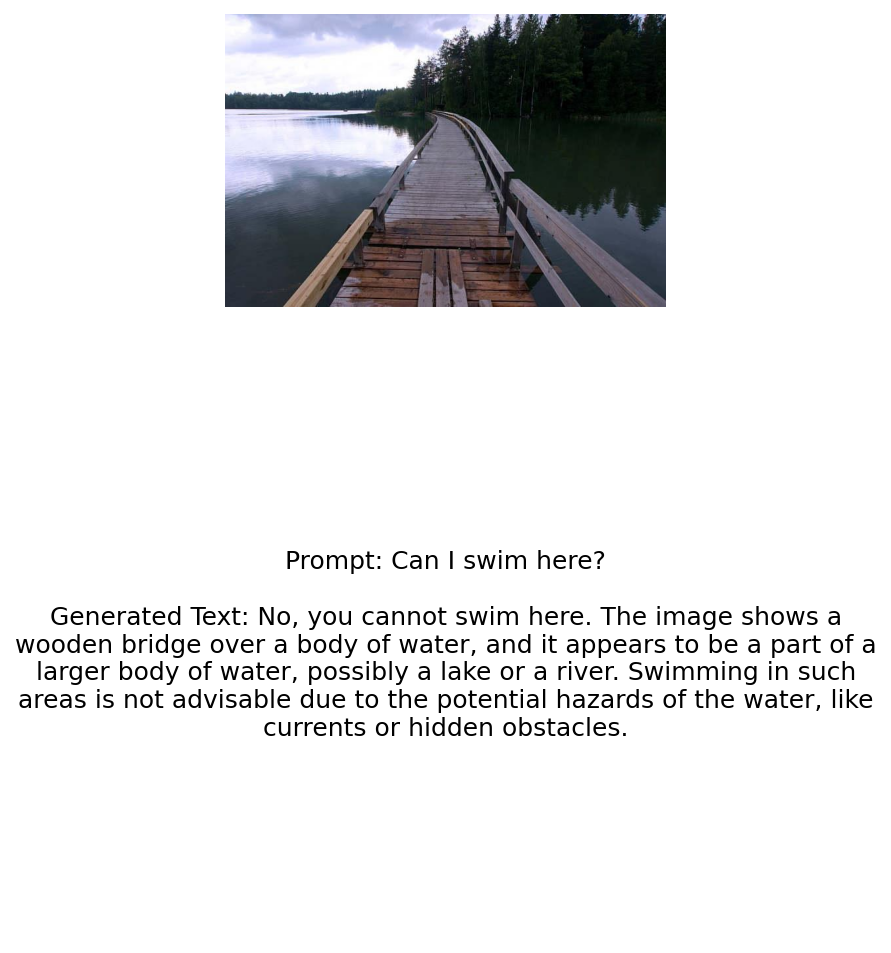

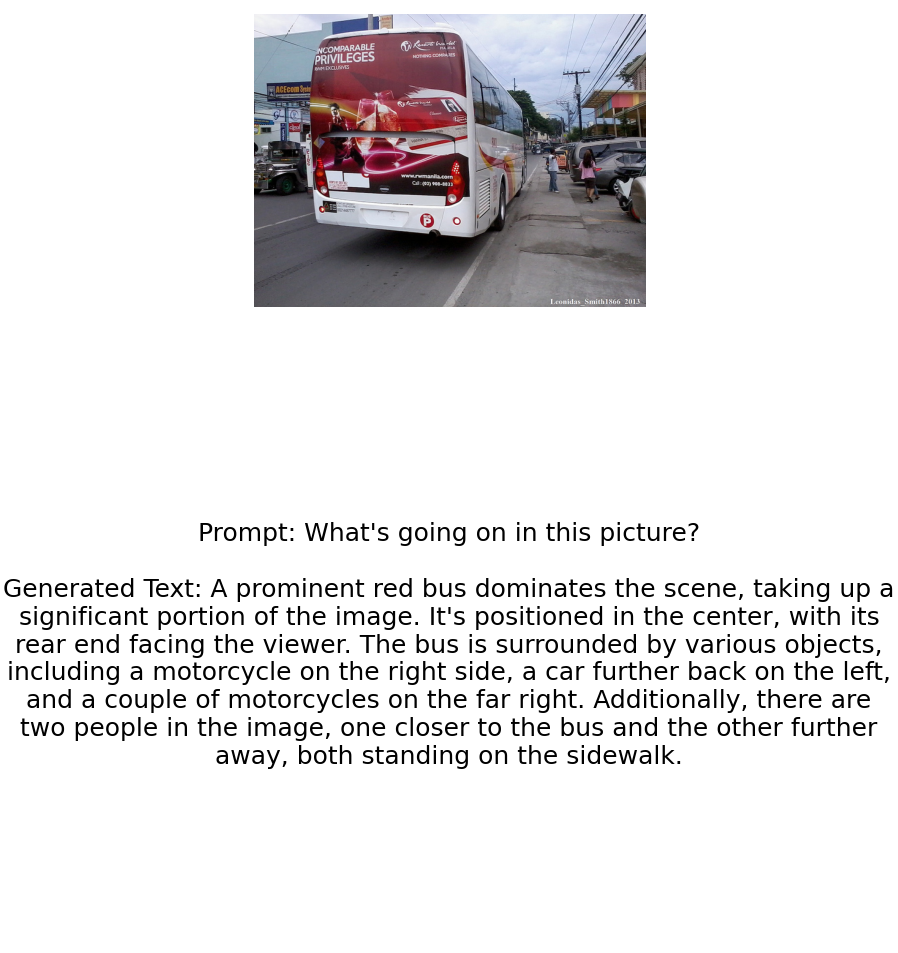

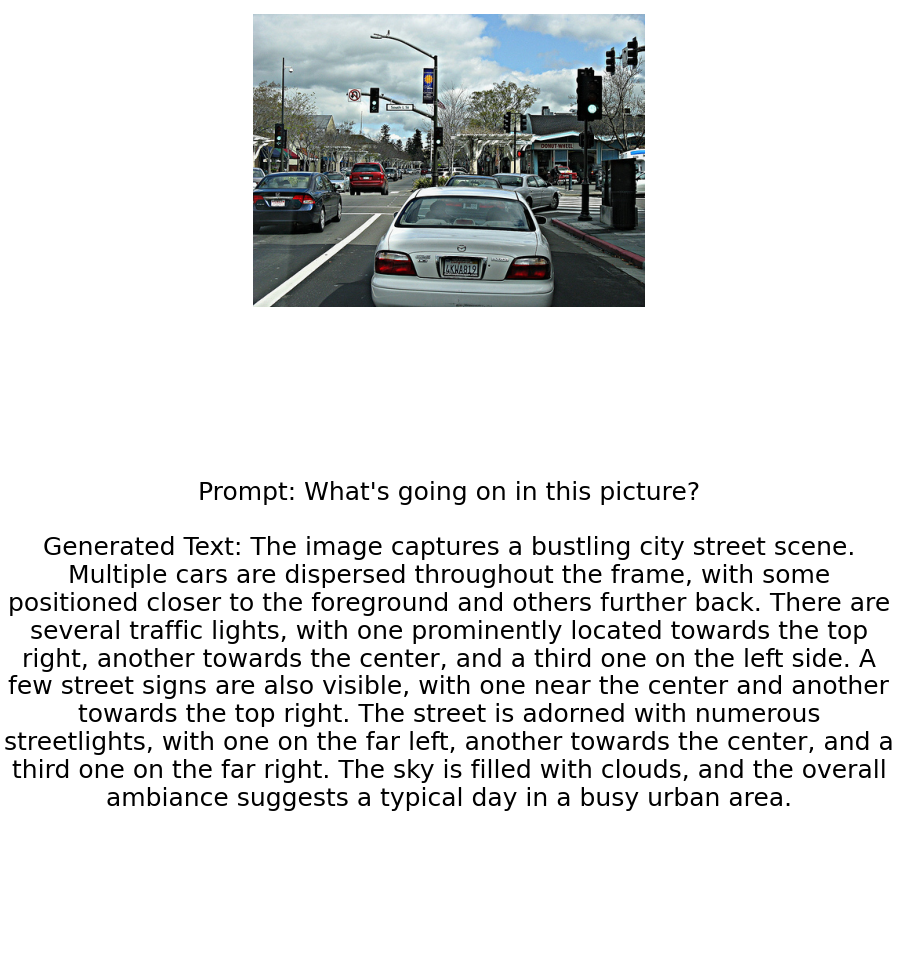

In [16]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from PIL import Image

desired_size = (150, 150)

for image_file, user_prompt in zip(image_files, user_prompts):
    image = Image.open("pic/" + image_file).convert("RGB")

    #image = image.resize(desired_size, Image.LANCZOS)

    prompt_builder = vlm.get_prompt_builder()
    prompt_builder.add_turn(role="human", message=user_prompt)
    prompt_text = prompt_builder.get_prompt()

    generate_params['image'] = image
    generate_params['prompt_text'] = prompt_text

    generated_text = vlm.generate(**generate_params)

    fig = plt.figure(figsize=(6, 8), dpi=150)
    gs = GridSpec(2, 1, height_ratios=[1, 2])

    ax0 = fig.add_subplot(gs[0])
    ax0.imshow(image)
    ax0.axis('off')

    ax1 = fig.add_subplot(gs[1])
    text = f"Prompt: {user_prompt}\n\nGenerated Text: {generated_text}"
    ax1.text(0.5, 0.5, text, ha='center', va='center', fontsize=12, wrap=True)
    ax1.axis('off')

    plt.subplots_adjust(hspace=0.1)

    plt.show()
